In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')

#### Click Button On Top To Show Code

In [2]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

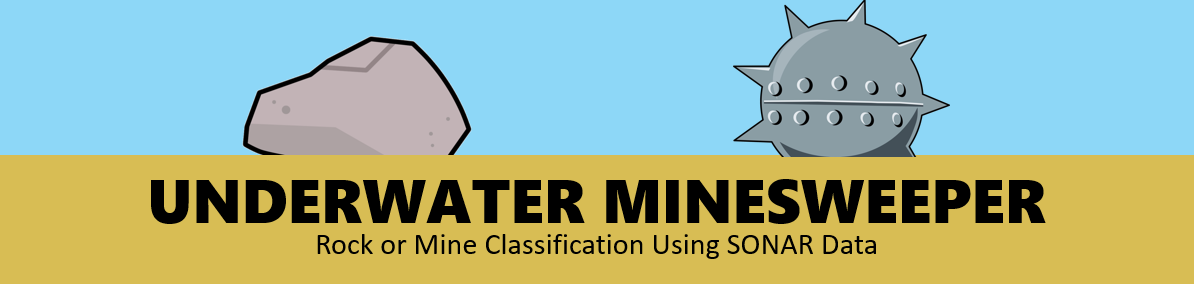

In [3]:
Image(filename="banner.PNG")

# Underwater Minesweeper : Mine Classification Using SONAR Data

In [4]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

## Introduction

`Sonar or Sound Navigation and Ranging` is a technique that uses sound propagation to navigate or detect objects underwater. There are two types, active or passive sonar. Active sonar involves the transmission and receiving of acoustic signals or pulses, into the water. If an object is hit, the sound bounces of the object and returns an echo to the transducer. Meanwhile passive sonar focuses on detecting noise from other underwater objects like submarines or even underwater creatures.
<br>

`Naval mines` are self-contained explosives found underwater. They are left underwater and are not triggered unless another vessel is detected nearby. The explosion creates damage to the ships or other marine structures nearby. They are mostly used for defensive purposes to mark a part of their territory to drive away unwanted vessels. This can also be used to concentrate their forces in areas that they identify as strategic. There are several types of naval mines, drifting, moored, and bottom mines. They can also be triggered differently either by contact, influence or remote controlled.  
<br>

Patrol ships with sonar capabilities are used to survey the seas for possible underwater mines. These boats are usually specialized to do passive countermeasures like mine detection without being detected. And in this study, several rock and metal items were simulated as underwater objects and using sonar, the energy feedback was recorded and used to interpret their corresponding classification.

## Highlights

- `Yeo-Johnson` transformation was done on the dataset because most of the features are skewed.
<br>

- There is a notable `increase in accuracy` after the features were scaled for kNN and SVC.
<br>

- `Grid search` was used to optimize the hyperparameters of chosen machine learning models.
<br>

- It is important to have a `holdout data set` to test the model’s performance after training and validation.
<br>

- Depending on the problem, precision or `recall` is more important than the accuracy of the model.

## Data

The dataset consists of 208 samples with a specific pattern represented by its features. Each feature ranges from 0 to 1 and represents the energy within a particular frequency band, over a period of time. Each sample is labeled at the target column as R or M, which corresponds to `Rock` or `Mine` respectively. See the sample dataset below:

In [5]:
# load dataset
df_sonar = pd.read_csv('sonar_data.csv')
df_sonar.head()

,w01,w02,w03,w04,w05,w06,w07,w08,w09,w10,...,w52,w53,w54,w55,w56,w57,w58,w59,w60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Distribution

The data distribution is almost even at 53%, 111 samples labeled as mines and 47% or 97 samples as rocks. The computed `Proportion Chance Criterion is 50.22%`, with a minimum accuracy set to `62.78%` for the model prediction to be valid.

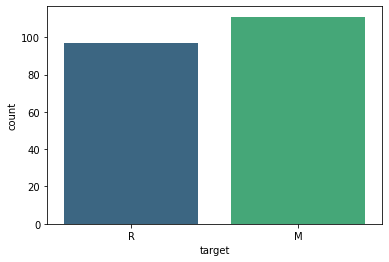

In [6]:
# data distribution
sns.countplot(df_sonar['target'],label="Count", palette='viridis')
plt.show()

In [7]:
# Check PCC

num=(df_sonar.groupby('target').size()/df_sonar.groupby('target').size().sum())**2

print("Proportion Chance Criterion (PCC) = {}%".format(100*num.sum()))
print("1.25 x PCC = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion (PCC) = 50.22651627218935%
1.25 x PCC = 62.783145340236686%


## Check For Null Values & Presence of Categorical Data

The dataset was checked for null values and none were found. Also, no categorical data, aside from the target feature was found. There is no need to encode the target value into a numerical value. The `features` are defined to be columns `w01 to w60`, while the `target` is set as the final column `target`.

In [8]:
# check for null values

print('Null Values Found: ' + str(df_sonar.isnull().sum().sum()))

Null Values Found: 0


In [9]:
# define features and target
X = df_sonar.drop('target', axis=1)
Y = df_sonar['target']

## Exploratory Data Analysis

The features' correaltion to each other was checked and there is a notable negative correlation found between the 20s to 30s features. Meanwhile the first and last set features are more positively correlated. No dimensionality reduction was done in this report due to the nature of the data of being a pattern for each specific sample.

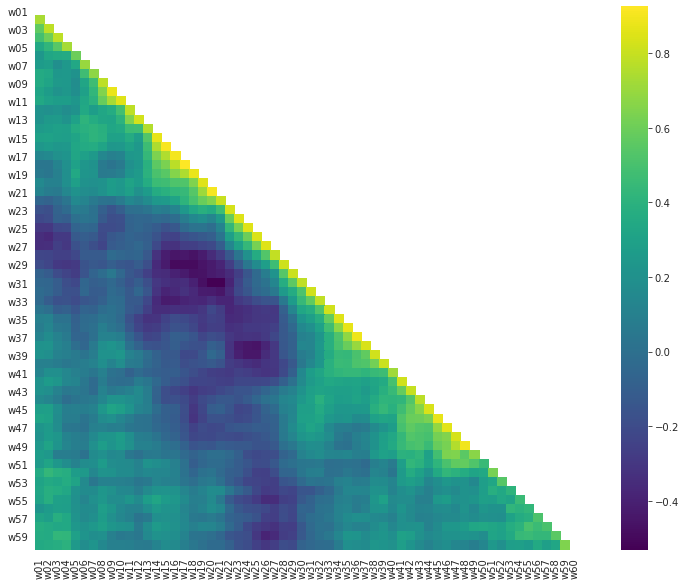

In [10]:
#check feature correlation

corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='viridis')

Each feature was also checked for their skewness and there was a precense of positively and negatively skewed distributions found. 

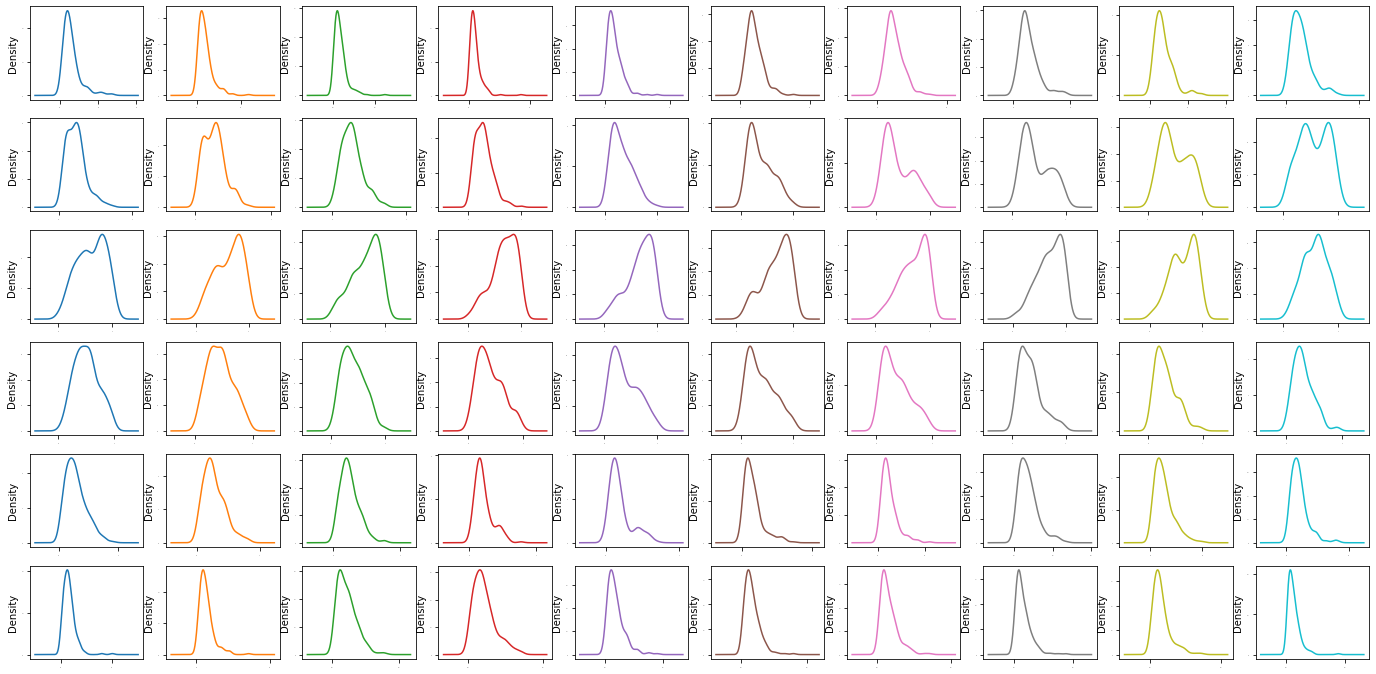

In [11]:
# check feature data skewness
X.plot(kind='density', subplots=True, layout=(6,10), sharex=False, 
       legend=False, fontsize=1, figsize=(24,12))
plt.show()

## Data Transformation

Several transformation methods could be used to correct the skewness of data including square root, cube root and log transforamtions. Yeo-Johnson transformation was used for this particular dataset. As seen below the data looks more normally distributed now. Some machine learning algorithms are executed better when the distribution of variables is more normal.

In [12]:
# perform yeo johnson transformation
from scipy.stats import yeojohnson

X_yf = pd.DataFrame()

for label in X.columns:
    target, lam = yeojohnson(X[label])
    X_yf[label] = target

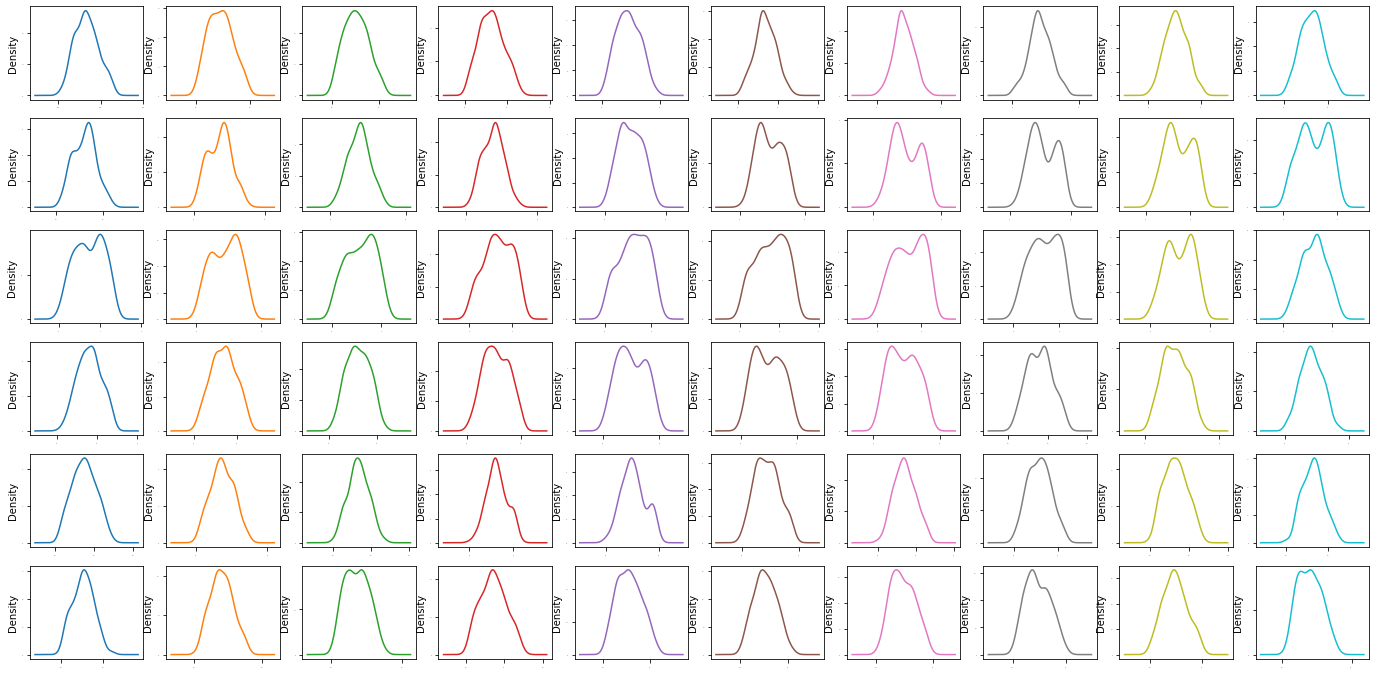

In [13]:
# check feature data skewness after transformation
X_yf.plot(kind='density', subplots=True, layout=(6,10), sharex=False, 
          legend=False, fontsize=1, figsize=(24,12))
plt.show()

In [14]:
# set random state for consistent results

random_state = 1
scoring = 'accuracy'

## Split Data to Train & Holdout Sets

The data was split between a holdout subset and a training subset. The training dataset comprises of 75% of the original data and will be used to train and validate the models. Meanwhile, the holdout subset will be used later on as a final check of the model's performance. This will be a good measure because the model haven't seen this particular subset of data yet.

In [15]:
# divide dataset into test and hold out set
X_train, X_val, Y_train, Y_val = train_test_split(X_yf, Y, test_size=0.25, 
                                                  random_state=random_state)

## Results and Discussions

## Run Models before Scaling

Initial training is done for 6 classifier models using `unscaled` data, namely: kNN, Logistic Regression, Support Vector, Decision Tree, Random Forest and Gradient Boosting. For the initial results `Gradient Boosting` got the highest accuracy, followed by Random Forest and kNN. This was done using `cross_val_score` with `stratifiedkFold` as the cross validation technique.

In [16]:
# define ML models
models = [('kNN Classifier', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression()), 
          ('Support Vector Classifier', SVC()), 
          ('Decision Tree Classifier', 
           DecisionTreeClassifier(random_state=random_state)),
          ('Random Forest Classifier', 
           RandomForestClassifier(random_state=random_state)), 
          ('Gradient Boosting Classifier', 
           GradientBoostingClassifier(random_state=random_state))]

extra = [('AdaBoost Classifier', AdaBoostClassifier())]

In [17]:
# run models, data not scaled
for label, model in models:
    skfold =  StratifiedKFold(n_splits=20, shuffle=False, 
                              random_state=random_state)
    cv_results = cross_val_score(model, X_train, Y_train, 
                                 cv=skfold, scoring=scoring)
    print("%s: %.4f +/- %.2f" % (label, cv_results.mean(), cv_results.std()))

kNN Classifier: 0.8027 +/- 0.12
Logistic Regression: 0.7009 +/- 0.16
Support Vector Classifier: 0.7107 +/- 0.12
Decision Tree Classifier: 0.7143 +/- 0.16
Random Forest Classifier: 0.8098 +/- 0.11
Gradient Boosting Classifier: 0.8152 +/- 0.14


## Scaling

Min-Max scaling was done to the whole features subset of the data.

In [18]:
# scaling
scaler = MinMaxScaler().fit(X_train)
X_ss = scaler.transform(X_train)

## Run Models after Scaling

The 6 models were retrained, this time with the `scaled` data. There is a notable increase in the accuracies of kNN, Logistic Regression and Support Vector models, meanwhile there is no change for the 3 tree based models. This is expected as standardization or normalization does not affect these types of models. The `kNN classifier` is now the model with the highest accuracy followed by SVC and GBM.

In [19]:
# run models, data scaled
for label, model in models:
    skfold =  StratifiedKFold(n_splits=20, shuffle=False, 
                              random_state=random_state)
    cv_results = cross_val_score(model, X_ss, Y_train, 
                                 cv=skfold, scoring=scoring)
    print("%s: %.4f +/- %.2f" % (label, cv_results.mean(), cv_results.std()))

kNN Classifier: 0.8482 +/- 0.12
Logistic Regression: 0.7911 +/- 0.14
Support Vector Classifier: 0.8348 +/- 0.15
Decision Tree Classifier: 0.7143 +/- 0.16
Random Forest Classifier: 0.8098 +/- 0.11
Gradient Boosting Classifier: 0.8152 +/- 0.14


## Model Selection

Due to the high accuracy readings, the following models were selected for further optimization: kNN, Support Vector and Gradient Boosting Method.

## kNN GridSearch

Using grid search, the kNN model will be optimized by looking for its best hyperparameter. In this case, the best number of `n_neighbors` will be checked. The range used for checking is all integers from 1 to 20 and after using grid search, the best hyperparameter chosen is `n_neighbors=1`. This improved the accuracy of the model to `87.94%`.

In [20]:
# gridsearch for kNN model
knn = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

param_grid = dict(n_neighbors=neighbors)

skfold = StratifiedKFold(n_splits=20, shuffle=False, 
                         random_state=random_state)

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=skfold)
knn_result = grid_search.fit(X_ss, Y_train)

print("Best Accuracy: %f Best hyperparameter: %s" % (knn_result.best_score_, 
                                                     knn_result.best_params_))

Best Accuracy: 0.879464 Best hyperparameter: {'n_neighbors': 1}


Using the best hyperparameters, the model is again trained and then was used to predict the classifications of the holdout dataset. The `holdout accuracy` recorded was `92.3%`. Check the confusion matrix below to see how the prediction went. In this study, it is important to see if all mines were correctly identified, this can be measured using the recall for the mine calssification. It can be seen from the matrix that out of 27 mines, 26 were correctly identified, marking a `mine recall of 96%`

In [21]:
# test top hyperparameters on hold out data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_ss, Y_train)

X_val_scaled = scaler.transform(X_val)
knn_pred = knn.predict(X_val_scaled)

print("Holdout Accuracy: %f" % accuracy_score(Y_val, knn_pred))

Holdout Accuracy: 0.923077


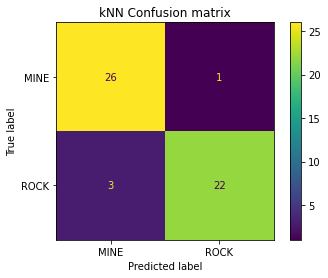

In [22]:
# plot confusion matrix
cm_knn = plot_confusion_matrix(knn, X_val_scaled, Y_val,
                             display_labels=['MINE', 'ROCK'],
                             cmap='viridis',
                             normalize=None)

cm_knn.ax_.set_title('kNN Confusion matrix');

## SVC GridSearch

Using grid search, the SVC model will be optimized by looking for its best hyperparameter. In this case, the best number of `C` value, type of `kernel` and best value for `gamma` will be checked. After using grid search, the best hyperparameters chosen are `C=1, kernel=rbf and gamma=1`. This improved the accuracy of the model to `84.19%`.

In [23]:
# gridsearch for SVC model
svc = SVC(random_state=random_state)

c_values = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto', 1.0, 0.1, 0.01, 0.001, 0.0001]

param_grid = dict(C=c_values, kernel=kernel_values, gamma=gamma)

skfold = StratifiedKFold(n_splits=20, shuffle=False, 
                         random_state=random_state)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=skfold)
svc_result = grid_search.fit(X_ss, Y_train)

print("Best Accuracy: %f Best hyperparameter: %s" % (svc_result.best_score_,
                                                     svc_result.best_params_))

Best Accuracy: 0.841964 Best hyperparameter: {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


Using the best hyperparameters, the model is again trained and then was used to predict the classifications of the holdout dataset. The `holdout accuracy` recorded was `92.3%`. Check the confusion matrix below to see how the prediction went. In this study, it is important to see if all mines were correctly identified, this can be measured using the recall for the mine classification. It can be seen from the matrix that out of 27 mines, all were correctly identified, marking a `mine recall of 100%`

In [24]:
# test top hyperparameters on hold out data
svc = SVC(C=1, kernel = 'rbf', random_state=random_state, gamma=1)
svc.fit(X_ss, Y_train)

X_val_scaled = scaler.transform(X_val)
svc_pred = svc.predict(X_val_scaled)

print("Holdout Accuracy: %f" % accuracy_score(Y_val, svc_pred))

Holdout Accuracy: 0.923077


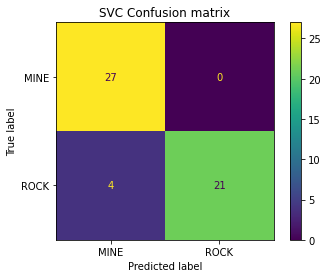

In [25]:
# plot confusion matrix
cm_svc = plot_confusion_matrix(svc, X_val_scaled, Y_val,
                             display_labels=['MINE', 'ROCK'],
                             cmap='viridis',
                             normalize=None)

cm_svc.ax_.set_title('SVC Confusion matrix');

## GBM GridSearch

Using grid search, the GBM model will be optimized by looking for its best hyperparameter. In this case, the best number of `n_estimators, max_features and learning rate` will be checked. After using grid search, the best hyperparameters chosen are `n_estimators=150, max_features=0.3 and learning rate=0.2`. This improved the accuracy of the model to `87.94%`.

In [26]:
# gridsearch for GBM model
gbm = GradientBoostingClassifier(random_state=random_state)

n_estimators = [50, 100, 150, 200]
max_features = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, 
                  learning_rate=learning_rate)

skfold = StratifiedKFold(n_splits=20, shuffle=False, 
                         random_state=random_state)

grid_search = GridSearchCV(gbm, param_grid, scoring="accuracy", 
                           n_jobs=-1, cv=skfold)
gbm_result = grid_search.fit(X_ss, Y_train)

print("Best Accuracy: %f Best hyperparameter: %s" % (gbm_result.best_score_, 
                             gbm_result.best_params_))

Best Accuracy: 0.879464 Best hyperparameter: {'learning_rate': 0.2, 'max_features': 0.3, 'n_estimators': 150}


Using the best hyperparameters, the model is again trained and then was used to predict the classifications of the holdout dataset. The `holdout accuracy` recorded was `82.7%`. Check the confusion matrix below to see how the prediction went. In this study, it is important to see if all mines were correctly identified, this can be measured using the recall for the mine calssification. It can be seen from the matrix that out of 27 mines, 26 were correctly identified, marking a `mine recall of 96%`

In [27]:
# test top hyperparameters on hold out data
gbm = GradientBoostingClassifier(n_estimators=150, max_features=0.3, 
                                 learning_rate=0.2,
                                 random_state=random_state)
gbm.fit(X_ss, Y_train)

X_val_scaled = scaler.transform(X_val)
gbm_pred = gbm.predict(X_val_scaled)

print("Holdout Accuracy: %f" % accuracy_score(Y_val, gbm_pred))

Holdout Accuracy: 0.826923


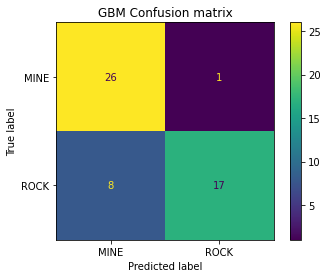

In [28]:
# plot confusion matrix
cm_gbm = plot_confusion_matrix(gbm, X_val_scaled, Y_val,
                             display_labels=['MINE', 'ROCK'],
                             cmap='viridis',
                             normalize=None)
cm_gbm.ax_.set_title('GBM Confusion matrix');

## Additional Model: AdaBoost

`AdaBoost or Adapative Boosting` is an example of an ensemble technique that like GBM uses weak classifiers and in this case, the most common ones are decision trees with only two leaves (called a stump). They aim to boost these weak learners by adding the weak models sequentially and then trained using the weighted training data. This goes on until there is no more improvement observed on the training dataset. AdaBoost seems to work best as a classifier that is why I used it in this report for comparison with our other models.
<br>

The training and validation accuracy for the scaled data when used in AdaBoost was `88.66%`

In [29]:
for label, model in extra:
    skfold =  StratifiedKFold(n_splits=20, shuffle=False, 
                              random_state=random_state)
    cv_results = cross_val_score(model, X_ss, Y_train, cv=skfold, 
                                 scoring=scoring)

    print("%s: %.4f +/- %.2f" % (label, cv_results.mean(), cv_results.std()))

AdaBoost Classifier: 0.8866 +/- 0.12


Using grid search, the AdaBoost model will be optimized by looking for its best hyperparameter. In this case, the best number of `n_estimators and learning rate` will be checked. After using grid search, the best hyperparameters chosen are `n_estimators=50 and learning rate=1`. These are the default values for the hyperparameter. This resulted to the same accuracy of `88.67%`.

In [30]:
# gridsearch for adaboost model
ada = AdaBoostClassifier(random_state=random_state)

n_estimators = [50, 100, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)

skfold = StratifiedKFold(n_splits=20, shuffle=False, 
                         random_state=random_state)

grid_search = GridSearchCV(ada, param_grid, scoring='accuracy', cv=skfold)
ada_result = grid_search.fit(X_ss, Y_train)

print("Best Accuracy: %f Best hyperparameter: %s" % (ada_result.best_score_, 
                                                     ada_result.best_params_))

Best Accuracy: 0.886607 Best hyperparameter: {'learning_rate': 1, 'n_estimators': 50}


Using the best hyperparameters, the model is again trained and then was used to predict the classifications of the holdout dataset. The `holdout accuracy` recorded was `84.61%`. Check the confusion matrix below to see how the prediction went. In this study, it is important to see if all mines were correctly identified, this can be measured using the recall for the mine calssification. It can be seen from the matrix that out of 27 mines, 23 were correctly identified, marking a `mine recall of 85%`

In [31]:
# test top hyperparameters on hold out data
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(X_ss, Y_train)

X_val_scaled = scaler.transform(X_val)
ada_pred = ada.predict(X_val_scaled)

print("Holdout Accuracy: %f" % accuracy_score(Y_val, ada_pred))

Holdout Accuracy: 0.846154


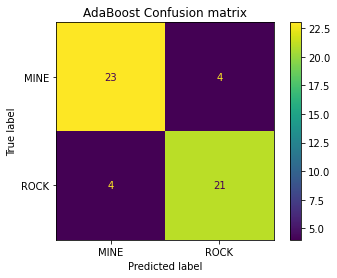

In [32]:
# plot confusion matrix
cm_knn = plot_confusion_matrix(ada, X_val_scaled, Y_val,
                             display_labels=['MINE', 'ROCK'],
                             cmap='viridis',
                             normalize=None)

cm_knn.ax_.set_title('AdaBoost Confusion matrix');

## Conclusion

Several steps were used to improve the accuracy of the models used in this report. First was the Yeo-Johnson transformation to correct the features data’s skewness. The data was also scaled afterward using the Min-Max scaler. After training the different models using the training dataset, it was observed that kNN and SVC models greatly improved after the adjustment to the dataset. The transformations and scaling did not affect the ensemble model GBM as expected. These models were then improved by using gridsearchSV where optimal hyperparameters were obtained for each.
<br>

Applying the best hyperparameters, the models were then tested for their effectiveness in predicting the holdout data set which was excluded at the beginning of the process. kNN and SVC got high accuracy percentages for the hold out dataset at 92% which is a good indicator of the model’s predicting capability. However, for our main problem, it is paramount to have a model which can correctly identify every mine because it will be catastrophic if we missed any of them. `The SVC model was able to do this and has a 100% recall score for the mines.` It is always important to know what you really want from your data because the accuracy readings are not all that there is in these models.
<br>

The AdaBoost model was also checked being a good classifier model, true enough the accuracy for the training set was higher than all the other models, unfortunately once tested with the holdout dataset, it got the lowest accuracy and recall scores. For this particular exercise, the best model to use is SVC.
<br>

Rooms for improvement in this study can include increasing the sample size by bootstrap sampling. Other transformation methods could also be used for the skewness of the data. Meanwhile for the models, other models like Extra Tree and XG Boost could also be tested. Hyperparameter optimization could also be improved by including more hyperparameters in our gridsearch.
<br>


## References

I would like to acknowledge my references for this study:

 - Naval Mines Wikipedia Page (n.d), https://en.wikipedia.org/wiki/Naval_mine#Types
 - The Special Case of Sea Mines (n.d), https://www.intechopen.com/chapters/55688
 - Data Transformation - Skewness & Normalziation (n.d), https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
 - Box-Cox and Yeo-Johnson Transformations (n.d), https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/
 - UCI Machine Learning Reporsitory (Data Set), https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
 - Kaggle - Sonra Mines vs Rocks w/ explanations (n.d), https://www.kaggle.com/eorleli/sonar-mines-vs-rocks-with-explanations
 - Kaggle - Intoduction to Classification (n.d), https://www.kaggle.com/edhenrivi/introduction-classification-sonar-dataset
 - Boosting and AdaBoost for Machine Learning (n.d), https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/